In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import requests
import statsmodels.api as sm

In [2]:
np.set_printoptions(precision=4)

pd.options.display.max_rows = 20

In [3]:
data = pd.read_csv("players.csv") #Importing the data

In [4]:
data

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,4571,2018,2018,"January 4, 1997",NaN,6-11,Ante Zizic,F-C,/players/z/zizican01.html,250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4572,4572,1983,1983,"December 20, 1953",Kent State University,7-1,Jim Zoet,C,/players/z/zoetji01.html,240.0,...,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,4573,1971,1971,"June 7, 1948",Duquesne University,6-1,Bill Zopf,G,/players/z/zopfbi01.html,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4574,4574,2017,2018,"March 18, 1997",NaN,7-1,Ivica Zubac,C,/players/z/zubaciv01.html,265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,Unnamed: 0,active_from,active_to,weight,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
count,4576.000000,4576.000000,4576.000000,4570.000000,3448.000000,2953.000000,3448.000000,3426.000000,4548.000000,4576.000000,...,1871.000000,0.0,2582.000000,2583.000000,2598.000000,2594.000000,2592.000000,2598.000000,2598.000000,2598.000000
mean,2287.500000,1985.263330,1989.450393,208.915974,0.851885,0.236988,0.279118,0.451435,0.407901,2.458829,...,0.844094,NaN,10.274516,0.495974,5.052694,0.711055,4.029900,2.880716,98.307544,13.574057
std,1321.121746,21.060432,21.937301,26.243075,1.196153,0.161189,0.439907,0.100671,0.105117,1.807253,...,0.801787,NaN,3.633562,0.061320,1.780048,0.086036,1.598179,1.211084,30.447005,4.566653
min,0.000000,1947.000000,1947.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,1.200000,0.201000,0.700000,0.295000,0.500000,0.300000,11.000000,1.600000
25%,1143.750000,1969.000000,1973.000000,190.000000,0.000000,0.125000,0.000000,0.421000,0.366000,1.100000,...,0.100000,NaN,7.900000,0.453000,3.800000,0.659000,2.900000,2.100000,76.000000,10.500000
50%,2287.500000,1987.000000,1992.000000,210.000000,0.300000,0.268000,0.100000,0.464000,0.423000,2.000000,...,0.700000,NaN,10.000000,0.492000,4.900000,0.720000,3.800000,2.800000,106.000000,13.400000
75%,3431.250000,2004.000000,2009.000000,225.000000,1.300000,0.340000,0.400000,0.498000,0.464000,3.400000,...,1.400000,NaN,12.300000,0.533500,6.000000,0.770000,4.900000,3.600000,123.000000,16.200000
max,4575.000000,2018.000000,2018.000000,360.000000,7.800000,1.000000,3.400000,1.500000,1.000000,12.100000,...,4.000000,NaN,38.100000,1.211000,16.700000,1.266000,14.400000,10.800000,152.000000,44.200000


In [6]:
data.info() #looking at all of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4576 non-null   int64  
 1   active_from       4576 non-null   int64  
 2   active_to         4576 non-null   int64  
 3   birth_date        4547 non-null   object 
 4   college           4274 non-null   object 
 5   height            4575 non-null   object 
 6   name              4576 non-null   object 
 7   position          4575 non-null   object 
 8   url               4576 non-null   object 
 9   weight            4570 non-null   float64
 10  NBA__3ptapg       3448 non-null   float64
 11  NBA__3ptpct       2953 non-null   float64
 12  NBA__3ptpg        3448 non-null   float64
 13  NBA_efgpct        3426 non-null   float64
 14  NBA_fg%           4548 non-null   float64
 15  NBA_fg_per_game   4576 non-null   float64
 16  NBA_fga_per_game  4576 non-null   float64


**TRANSFORMATIONS**

In [7]:
#Dropping the unwanted columns
nba = data[["name", "height", "weight", "position", 'active_from', 'active_to',"NBA__3ptapg", 'NBA__3ptpg','NBA__3ptpct','NBA_efgpct',
          "NBA_fg%", 'NBA_fg_per_game', 'NBA_fga_per_game','NBA_ft%','NBA_ft_per_g','NBA_fta_p_g','NBA_g_played','NBA_ppg']]

In [8]:
nba.head()

,name,height,weight,position,active_from,active_to,NBA__3ptapg,NBA__3ptpg,NBA__3ptpct,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,NBA_ft_per_g,NBA_fta_p_g,NBA_g_played,NBA_ppg
0,Alaa Abdelnaby,6-10,240.0,F-C,1991,1995,0.0,0.0,0.000,0.502,0.502,2.4,4.8,0.701,0.9,1.3,256,5.7
1,Zaid Abdul-Aziz,6-9,235.0,C-F,1969,1978,NaN,NaN,NaN,NaN,0.428,3.5,8.2,0.728,2.0,2.8,505,9.0
2,Kareem Abdul-Jabbar,7-2,225.0,C,1970,1989,0.0,0.0,0.056,0.559,0.559,10.2,18.1,0.721,4.3,6.0,1560,24.6
3,Mahmoud Abdul-Rauf,6-1,162.0,G,1991,2001,2.3,0.8,0.354,0.472,0.442,6.0,13.6,0.905,1.8,2.0,586,14.6
4,Tariq Abdul-Wahad,6-6,223.0,F,1998,2003,0.3,0.1,0.237,0.422,0.417,3.1,7.3,0.703,1.6,2.2,236,7.8


In [9]:
#creating position class
position_class = []
for value in nba['position']:
    if value == 'F-C'or value =='C-F'or value == 'F-G'or value == 'G-F':
        position_class.append("multi")
    else:
        position_class.append("single")

nba["position_class"] = position_class


position_class_a = []
position_class_b = []

for value in nba['position']:
    # print(value)
    if value == 'F-C'or value =='C-F' or value == 'F-G' or value == 'G-F':
        position_class_a.append(0)
        position_class_b.append(1)
    else:
        position_class_a.append(1)
        position_class_b.append(0)


nba["single"] = position_class_a
nba["multi"] = position_class_b


/tmp/ipykernel_56/3686997519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["position_class"] = position_class
/tmp/ipykernel_56/3686997519.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["single"] = position_class_a
/tmp/ipykernel_56/3686997519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [10]:
#creating height class

height_class = []
for value in nba['height']:
    # print(value)
    if value == '5-3'or value == '5-6'or value == '5-7'or value == '5-8'or value ==  '5-9'or value == '5-10'or value ==  '5-11':
        height_class.append("under 6")
    elif value == '6-0'or value ==  '6-1'or value == '6-2'or value ==  '6-3' or value ==  '6-4'or value == '6-5':
        height_class.append("bottom 6")
    elif value == '6-6'or value == '6-7'or value ==  '6-8'or value == '6-9'or value == '6-10'or value == '6-11':
        height_class.append("top 6")
    else:
        height_class.append("7 plus")

nba["height_class"] = height_class
        
height_class_a = []
height_class_b = []
height_class_c = []
height_class_d = []
for value in nba['height']:
    # print(value)
    if value == '5-3'or value == '5-6'or value == '5-7'or value == '5-8'or value ==  '5-9'or value == '5-10'or value ==  '5-11':
        height_class_a.append(1)
        height_class_b.append(0)
        height_class_c.append(0)
        height_class_d.append(0)
    elif value == '6-0'or value ==  '6-1'or value == '6-2'or value ==  '6-3' or value ==  '6-4'or value == '6-5':
        height_class_a.append(0)
        height_class_b.append(1)
        height_class_c.append(0)
        height_class_d.append(0)
    elif value == '6-6'or value == '6-7'or value ==  '6-8'or value == '6-9'or value == '6-10'or value == '6-11':
        height_class_a.append(0)
        height_class_b.append(0)
        height_class_c.append(1)
        height_class_d.append(0)
    else:
        height_class_a.append(0)
        height_class_b.append(0)
        height_class_c.append(0)
        height_class_d.append(1)

nba["under_6"] = height_class_a
nba["bottom_6"] = height_class_b
nba["top_6"] = height_class_c
nba["7_plus"] = height_class_d

/tmp/ipykernel_56/2942535940.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["height_class"] = height_class
/tmp/ipykernel_56/2942535940.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["under_6"] = height_class_a
/tmp/ipykernel_56/2942535940.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [11]:
nba.head() 

,name,height,weight,position,active_from,active_to,NBA__3ptapg,NBA__3ptpg,NBA__3ptpct,NBA_efgpct,...,NBA_g_played,NBA_ppg,position_class,single,multi,height_class,under_6,bottom_6,top_6,7_plus
0,Alaa Abdelnaby,6-10,240.0,F-C,1991,1995,0.0,0.0,0.000,0.502,...,256,5.7,multi,0,1,top 6,0,0,1,0
1,Zaid Abdul-Aziz,6-9,235.0,C-F,1969,1978,NaN,NaN,NaN,NaN,...,505,9.0,multi,0,1,top 6,0,0,1,0
2,Kareem Abdul-Jabbar,7-2,225.0,C,1970,1989,0.0,0.0,0.056,0.559,...,1560,24.6,single,1,0,7 plus,0,0,0,1
3,Mahmoud Abdul-Rauf,6-1,162.0,G,1991,2001,2.3,0.8,0.354,0.472,...,586,14.6,single,1,0,bottom 6,0,1,0,0
4,Tariq Abdul-Wahad,6-6,223.0,F,1998,2003,0.3,0.1,0.237,0.422,...,236,7.8,single,1,0,top 6,0,0,1,0


**DATA QUESTIONS**

**How has scoring changed over time**

<AxesSubplot:xlabel='active_to'>

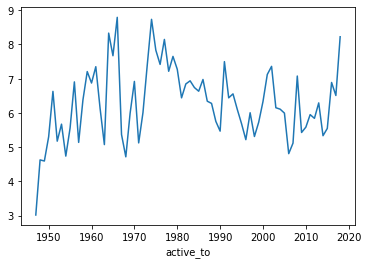

In [12]:
#creating a timeseries line plot for scoring overtime in the NBA
nba_by_year = nba.groupby("active_to")["NBA_ppg"].mean()
nba_by_year.plot()

**What postions average the most points?**

In [13]:
#Average ppg by position
position_points = nba.groupby("position")["NBA_ppg"].mean()
position_points.head(10)

position
C      5.157937
C-F    7.859361
F      5.364688
F-C    8.073590
F-G    9.426267
G      6.303084
G-F    8.053203
Name: NBA_ppg, dtype: float64

In [14]:
#Average ppg by postion group
group_position_points = nba.groupby("position_class")["NBA_ppg"].mean()
group_position_points

position_class
multi     8.275527
single    5.774019
Name: NBA_ppg, dtype: float64

**How much does height contribute to scoring?**

In [15]:
#Average ppg by height
height_points = nba.groupby("height")["NBA_ppg"].mean()
height_points.head(30)
 

height
5-10     6.252083
5-11     5.418033
5-3      3.850000
5-5      8.900000
5-6      5.700000
          ...    
7-3      5.861538
7-4      9.900000
7-5      0.750000
7-6     13.550000
7-7      6.200000
Name: NBA_ppg, Length: 28, dtype: float64

<AxesSubplot:>

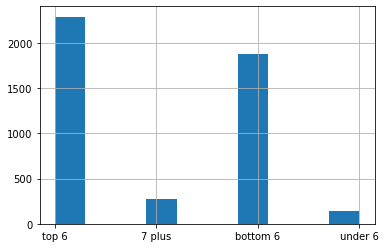

In [16]:
#distribution of heights across height groups
nba["height_class"].hist()

In [17]:
#points per game among height groups
group_height_points = nba.groupby("height_class")["NBA_ppg"].mean()
group_height_points

height_class
7 plus      5.848519
bottom 6    6.415344
top 6       6.519066
under 6     6.013139
Name: NBA_ppg, dtype: float64

**MAIN REGRESSION MODEL**

In [18]:
#Regression with both height and position as the dependant variables.

#Regression
Y = nba['NBA_ppg']
X = nba[['top_6',
 'bottom_6',
         'multi',
        'under_6']]

X = sm.add_constant(X)



ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_ppg   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     66.05
Date:                Wed, 04 May 2022   Prob (F-statistic):           2.12e-54
Time:                        18:32:05   Log-Likelihood:                -13483.
No. Observations:                4576   AIC:                         2.698e+04
Df Residuals:                    4571   BIC:                         2.701e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4989      0.281     19.543      0.000       4.947       6.050
top_6          0.1374      0.298      0.461      0.645      -0.448       0.723
bottom_6       0.4502      0.300      1.500      0.134      -0.138       1.039
multi          2.5514      0.159     16.060      0.000       2.240       2.863
under_6        0.2908      0.484      0.601      0.548      -0.657       1.239
==============================================================================
Omnibus:                      962.868   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1860.089
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       4.799   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**What position has the most 20 point scorers**

In [19]:
#more transformations to get percentage of position that are 20 point scorers
#creating sub dataframe for only players who averaged 30 points
twenty_point_scorers = nba[(nba["NBA_ppg"] >= 20)]

In [20]:
#looking at amount of 20 point scorers in each position
twenty_point_scorers = twenty_point_scorers.groupby("position").count()
twenty_point_scorers

,name,height,weight,active_from,active_to,NBA__3ptapg,NBA__3ptpg,NBA__3ptpct,NBA_efgpct,NBA_fg%,...,NBA_g_played,NBA_ppg,position_class,single,multi,height_class,under_6,bottom_6,top_6,7_plus
position,,,,,,,,,,,,,,,,,,,,,
C,10,10,10,10,10,6,6,6,6,10,...,10,10,10,10,10,10,10,10,10,10
C-F,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
F,11,11,11,11,11,10,10,10,10,11,...,11,11,11,11,11,11,11,11,11,11
F-C,7,7,7,7,7,6,6,6,6,7,...,7,7,7,7,7,7,7,7,7,7
F-G,12,12,12,12,12,9,9,9,9,12,...,12,12,12,12,12,12,12,12,12,12
G,19,19,19,19,19,16,16,16,16,19,...,19,19,19,19,19,19,19,19,19,19
G-F,6,6,6,6,6,5,5,5,5,6,...,6,6,6,6,6,6,6,6,6,6


In [21]:
#looking at amount of players total in each position
position_count = nba.groupby("position").count()
position_count

,name,height,weight,active_from,active_to,NBA__3ptapg,NBA__3ptpg,NBA__3ptpct,NBA_efgpct,NBA_fg%,...,NBA_g_played,NBA_ppg,position_class,single,multi,height_class,under_6,bottom_6,top_6,7_plus
position,,,,,,,,,,,,,,,,,,,,,
C,504,504,502,504,504,416,416,256,413,499,...,504,504,504,504,504,504,504,504,504,504
C-F,219,219,219,219,219,148,148,123,148,219,...,219,219,219,219,219,219,219,219,219,219
F,1297,1297,1296,1297,1297,999,999,804,987,1284,...,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297
F-C,390,390,390,390,390,275,275,250,274,389,...,390,390,390,390,390,390,390,390,390,390
F-G,217,217,217,217,217,137,137,131,137,215,...,217,217,217,217,217,217,217,217,217,217
G,1589,1589,1587,1589,1589,1225,1225,1149,1219,1582,...,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
G-F,359,359,359,359,359,247,247,239,247,359,...,359,359,359,359,359,359,359,359,359,359


In [22]:
#finding percent of each position that averaged 20 points
position_percent = pd.concat([twenty_point_scorers['name'], position_count['height']], axis = 1)

position_percent['percent'] = position_percent['name'] / position_percent['height'] * 100
position_percent

,name,height,percent
position,,,
C,10,504,1.984127
C-F,6,219,2.739726
F,11,1297,0.848111
F-C,7,390,1.794872
F-G,12,217,5.529954
G,19,1589,1.195721
G-F,6,359,1.671309


**What stats correlate the most with scoring**

In [23]:
#correlation matrix
nba.corr()

,weight,active_from,active_to,NBA__3ptapg,NBA__3ptpg,NBA__3ptpct,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,...,NBA_ft_per_g,NBA_fta_p_g,NBA_g_played,NBA_ppg,single,multi,under_6,bottom_6,top_6,7_plus
weight,1.000000,0.358932,0.368590,-0.225971,-0.201359,-0.195149,0.111721,0.275658,-0.004837,-0.100382,...,-0.034867,0.002871,0.086029,-0.018133,-0.093971,0.093971,-0.267813,-0.610189,0.508205,0.388477
active_from,0.358932,1.000000,0.978931,0.369656,0.354175,0.211234,0.109976,0.285534,-0.048888,-0.157157,...,-0.196885,-0.233814,0.038943,-0.046379,0.161872,-0.161872,-0.112172,-0.231369,0.200856,0.137889
active_to,0.368590,0.978931,1.000000,0.434778,0.424884,0.239458,0.194459,0.347606,0.085975,-0.032024,...,-0.076862,-0.117186,0.232007,0.087976,0.109113,-0.109113,-0.118014,-0.244829,0.213456,0.143476
NBA__3ptapg,-0.225971,0.369656,0.434778,1.000000,0.983217,0.462651,0.161833,-0.083083,0.369220,0.446970,...,0.255117,0.190577,0.258397,0.427647,0.041049,-0.041049,0.046543,0.207604,-0.138968,-0.139116
NBA__3ptpg,-0.201359,0.354175,0.424884,0.983217,1.000000,0.501427,0.219426,-0.032253,0.370796,0.438061,...,0.251861,0.187737,0.275821,0.429600,0.034025,-0.034025,0.044705,0.185722,-0.125084,-0.124658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
multi,0.093971,-0.161872,-0.109113,-0.041049,-0.034025,-0.045659,0.130730,0.100322,0.237106,0.238628,...,0.233536,0.248473,0.231555,0.231272,-1.000000,1.000000,-0.068725,-0.145101,0.199009,-0.069694
under_6,-0.267813,-0.112172,-0.118014,0.046543,0.044705,0.063792,-0.010136,-0.100540,-0.025021,0.021534,...,0.016633,0.009986,-0.050065,-0.015152,0.068725,-0.068725,1.000000,-0.146504,-0.175986,-0.043991
bottom_6,-0.610189,-0.231369,-0.244829,0.207604,0.185722,0.157108,-0.099892,-0.232855,-0.013675,0.061878,...,0.014600,-0.014099,-0.094139,-0.001138,0.145101,-0.145101,-0.146504,1.000000,-0.835391,-0.208822
top_6,0.508205,0.200856,0.213456,-0.138968,-0.125084,-0.115803,0.081067,0.212064,0.032401,-0.037190,...,-0.006130,0.016552,0.094535,0.020562,-0.199009,0.199009,-0.175986,-0.835391,1.000000,-0.250844


In [24]:
#making sub data frame only 1980 and on
three_point_era = nba[(nba["active_from"] >= 1979)]

In [25]:
#three pointers made per game among positions
three_point_scorers = three_point_era.groupby("position")["NBA__3ptpg"].mean()
three_point_scorers.head(10)

position
C      0.024501
C-F    0.109091
F      0.255976
F-C    0.105288
F-G    0.552041
G      0.494428
G-F    0.525128
Name: NBA__3ptpg, dtype: float64

In [26]:
#free throws made among each position
free_throw_scorers = nba.groupby("position")["NBA_ft_per_g"].mean()
free_throw_scorers.head(10)

position
C      1.104762
C-F    1.673973
F      1.059985
F-C    1.747179
F-G    1.967742
G      1.225110
G-F    1.630362
Name: NBA_ft_per_g, dtype: float64